# USDBRL - Data Story

Nesse notebook, realizaremos um estudo sobre fatos pertinentes ao preço do dólar no Brasil.

- Importação de dados via api. {bcb sgs}
- Limpeza e organização de dados  {pd}
- Visualizações {plotly.graph_objects}

Nosso objetivo é entender a evolução e fatos relevantes sobre o preço da moeda americana no Brasil

# Quantos dias o dolar subiu ou caiu?

In [120]:
from bcb import sgs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime

# Obtendo a série historica de cotações do dólar. 

In [132]:
dados = sgs.get({'DOLAR':1})
dados

,DOLAR
Date,
1984-11-28,2828.0000
1984-11-29,2828.0000
1984-11-30,2881.0000
1984-12-03,2881.0000
1984-12-04,2881.0000
...,...
2024-07-17,5.4670
2024-07-18,5.5426
2024-07-19,5.5543


In [133]:
dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DOLAR,9934.0,851.670022,4702.030393,0.829,1.860375,2.9191,5.36975,71153.0


# Criando um dataframe com booleans que serviram de base para nossa avaliação. 

In [134]:
#building a df where: 

dados['retorno'] = dados['DOLAR'].pct_change() # gets % change 
dados['positivo'] = dados['retorno'] > 0 # bool:  positive variation
dados['nenhum'] = dados['retorno'] == 0 # bool: no variation
dados['negativo'] = dados['retorno'] < 0 # bool:  negative variation

dados

,DOLAR,retorno,positivo,nenhum,negativo
Date,,,,,
1984-11-28,2828.0000,NaN,False,False,False
1984-11-29,2828.0000,0.000000,False,True,False
1984-11-30,2881.0000,0.018741,True,False,False
1984-12-03,2881.0000,0.000000,False,True,False
1984-12-04,2881.0000,0.000000,False,True,False
...,...,...,...,...,...
2024-07-17,5.4670,0.007296,True,False,False
2024-07-18,5.5426,0.013828,True,False,False
2024-07-19,5.5543,0.002111,True,False,False


<Axes: xlabel='Date'>

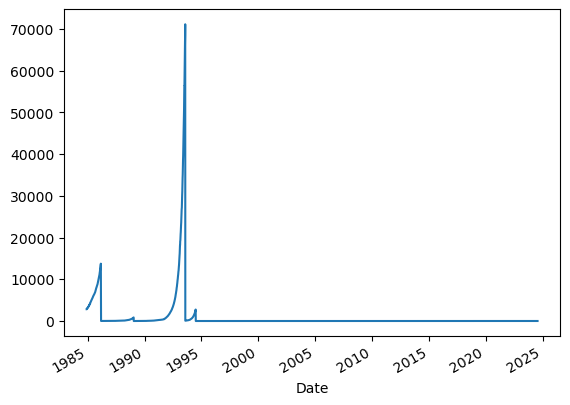

In [135]:
dados['DOLAR'].plot()

In [136]:
#somando os dados obtidos. 
dias_positivos = dados['positivo'].sum() 
dias_zerados = dados['nenhum'].sum()
dias_negativos = dados['negativo'].sum()

In [137]:
lista_dados = [dias_positivos, dias_zerados, dias_negativos]
legenda = ['Positivo', 'Zerado', 'Negativo']
lista_dados

[5863, 510, 3560]

# Contagem e Percentual de Variação do USDBRL

In [138]:
print(f'Durante o periodo houveram {dias_positivos} de variação positiva, {dias_zerados} sem variação, e {dias_negativos} de variação negativa')

Durante o periodo houveram 5863 de variação positiva, 510 sem variação, e 3560 de variação negativa


# Visualizando em percentual

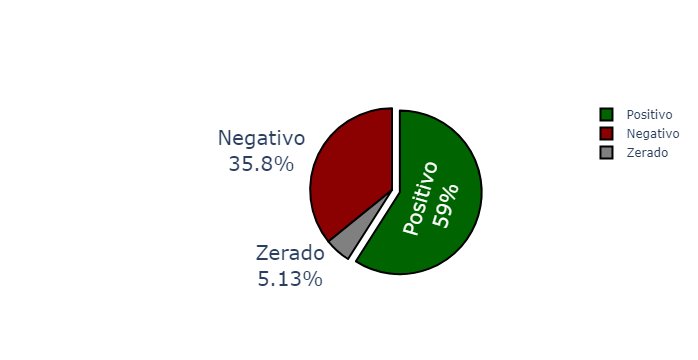

In [159]:
grafico_pizza = go.Figure(
    data=go.Pie(
        values=lista_dados,
        labels=legenda,
        pull=[0.1, 0, 0],  # Destaca a primeira fatia
        textinfo='label+percent',
        marker=dict(colors=['#006400', '#808080', '#8B0000'])  # Verde escuro, cinza, vermelho escuro
    )
)

grafico_pizza.update_traces(
    hoverinfo='label+percent',
    textfont_size=20,
    marker=dict(
        line=dict(color='#000000', width=2)  # Linha preta ao redor das fatias
    )
)

grafico_pizza.show()

# Histograma de retornos

In [140]:
histdata = sgs.get({'DOLAR':1})
histdata['retorno'] = histdata['DOLAR'].pct_change() # gets return

histdata = histdata[histdata.index > datetime(2000, 1, 1, 0, 0, 0)]

histdata

,DOLAR,retorno
Date,,
2000-01-03,1.8011,0.006764
2000-01-04,1.8337,0.018100
2000-01-05,1.8544,0.011289
2000-01-06,1.8461,-0.004476
2000-01-07,1.8281,-0.009750
...,...,...
2024-07-17,5.4670,0.007296
2024-07-18,5.5426,0.013828
2024-07-19,5.5543,0.002111


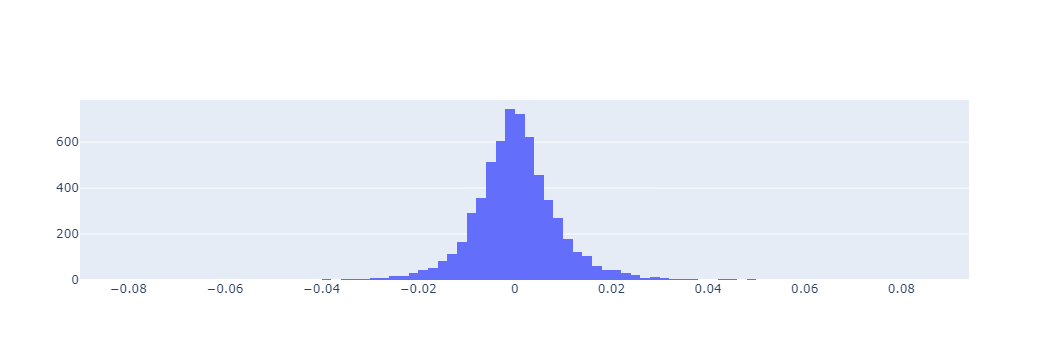

In [141]:
histograma = go.Figure(data=[go.Histogram(x=histdata['retorno'].values, nbinsx = 100)])

histograma

#  Mapa de calor de retornos mensais (10 anos)

In [142]:
dados = dados[dados.index > datetime(2014, 1, 1, 0, 0, 0)]
dados = dados.resample("ME").last() # gets monthly close
dados['retornos_mensais'] = dados['DOLAR'].pct_change() # montlhly return.
dados = dados.dropna()

dados


,DOLAR,retorno,positivo,nenhum,negativo,retornos_mensais
Date,,,,,,
2014-02-28,2.3334,-0.004352,False,False,True,-0.038289
2014-03-31,2.2630,0.001195,True,False,False,-0.030171
2014-04-30,2.2360,0.007253,True,False,False,-0.011931
2014-05-31,2.2390,0.006247,True,False,False,0.001342
2014-06-30,2.2025,0.002275,True,False,False,-0.016302
...,...,...,...,...,...,...
2024-03-31,4.9962,0.002126,True,False,False,0.002589
2024-04-30,5.1718,0.011006,True,False,False,0.035147
2024-05-31,5.2416,0.008543,True,False,False,0.013496


In [143]:
dados = dados.sort_index(ascending = False)
dados['mes'] = dados.index.month #obtain month
dados['ano'] = dados.index.year # obtain year
dados['retornos_mensais'] = (dados['retornos_mensais'] * 100).round(2) # gets return to format in % later 
dados

,DOLAR,retorno,positivo,nenhum,negativo,retornos_mensais,mes,ano
Date,,,,,,,,
2024-07-31,5.5807,0.003759,True,False,False,0.39,7,2024
2024-06-30,5.5589,0.006518,True,False,False,6.05,6,2024
2024-05-31,5.2416,0.008543,True,False,False,1.35,5,2024
2024-04-30,5.1718,0.011006,True,False,False,3.51,4,2024
2024-03-31,4.9962,0.002126,True,False,False,0.26,3,2024
...,...,...,...,...,...,...,...,...
2014-06-30,2.2025,0.002275,True,False,False,-1.63,6,2014
2014-05-31,2.2390,0.006247,True,False,False,0.13,5,2014
2014-04-30,2.2360,0.007253,True,False,False,-1.19,4,2014


# Heatmap of returns. 

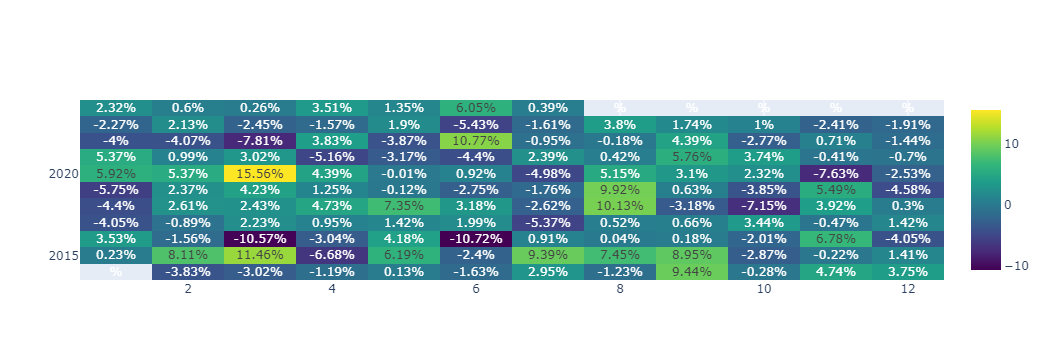

In [144]:
fig = go.Figure(data=go.Heatmap(
          x = dados['mes'].values,
          y = dados['ano'].values, 
          z = dados['retornos_mensais'].values,
          type = 'heatmap',
          colorscale = 'Viridis', text = dados['retornos_mensais'].values,
            texttemplate="%{text}%"))

fig

# Obtendo top 3 variações e buscando o contexto. 

É importante relembrar que essa análise **não tem viés político/idológico.** O que se busca aqui é levantar fatores do contexto político/econômico que contribuiram para a flutuação da moeda naquele período a grosso modo. 

In [153]:

# Encontrar as 3 maiores variações positivas e negativas
top_3_positivas = dados.nlargest(3, 'retornos_mensais')
top_3_negativas = dados.nsmallest(3, 'retornos_mensais')



## Top 3 Periodos de Alta do Dólar:

In [157]:
print(f"Top 3 maiores variações positivas:{top_3_positivas}")



Top 3 maiores variações positivas:             DOLAR   retorno  positivo  nenhum  negativo  retornos_mensais  \
Date                                                                         
2020-03-31  5.1987  0.007617      True   False     False             15.56   
2015-03-31  3.2080 -0.015981     False   False      True             11.46   
2022-06-30  5.2380  0.002143      True   False     False             10.77   

            mes   ano  
Date                   
2020-03-31    3  2020  
2015-03-31    3  2015  
2022-06-30    6  2022  


### Top 3 Maiores Variações Positivas

1. **2020-03-31**
   - **Contexto Econômico**: O Brasil estava no início da pandemia de COVID-19. Em março de 2020, o real brasileiro sofreu uma depreciação significativa devido à incerteza econômica global e ao impacto da pandemia. O dólar teve uma valorização acentuada contra o real nesse período, refletindo o aumento da demanda por ativos considerados seguros durante a crise.

2. **2015-03-31**
   - **Contexto Econômico**: O Brasil estava passando por uma crise econômica severa, conhecida como a crise econômica de 2015. Esse período foi marcado por uma desaceleração econômica, aumento da inflação e uma série de escândalos políticos que afetaram a confiança dos investidores. A crise levou a uma valorização do dólar em relação ao real.

3. **2022-06-30**
   - **Contexto Econômico**: Em junho de 2022, o Brasil estava lidando com os efeitos da inflação global e do aumento das taxas de juros. A valorização do dólar pode estar relacionada à percepção de incerteza econômica e instabilidade política interna, bem como às políticas monetárias em outros países que influenciam os mercados cambiais.


# Top 3 Periodos de baixa no Dólar

In [156]:
print(f"Top 3 maiores variações negativas:{top_3_negativas}")

Top 3 maiores variações negativas:             DOLAR   retorno  positivo  nenhum  negativo  retornos_mensais  \
Date                                                                         
2016-06-30  3.2098 -0.010390     False   False      True            -10.72   
2016-03-31  3.5589 -0.014592     False   False      True            -10.57   
2022-03-31  4.7378 -0.002505     False   False      True             -7.81   

            mes   ano  
Date                   
2016-06-30    6  2016  
2016-03-31    3  2016  
2022-03-31    3  2022  




### Top 3 Maiores Variações Negativas

1. **2016-06-30**
   - **Contexto Econômico**: Em 2016, o Brasil estava se recuperando da crise econômica que começou em 2015. O período também foi marcado por um processo de impeachment da presidente Dilma Rousseff e a troca de governo. O real brasileiro se valorizou um pouco em relação ao dólar devido a um otimismo renovado com a mudança política e a expectativa de reformas econômicas.

2. **2016-03-31**
   - **Contexto Econômico**: O início de 2016 foi um período de incerteza econômica e política, mas também de algumas expectativas positivas de recuperação. O governo estava implementando políticas para estabilizar a economia e o mercado cambial, o que levou a uma breve valorização do real frente ao dólar.

3. **2022-03-31**
   - **Contexto Econômico**: Em março de 2022, o Brasil estava enfrentando uma inflação alta e incertezas políticas, mas também havia expectativas de que a economia poderia estar se estabilizando. A menor variação negativa pode estar relacionada a uma leve recuperação do real ou a uma estabilidade relativa em relação às expectativas econômicas globais.

Se precisar de mais detalhes sobre o contexto de cada período, posso ajudar com informações adicionais!

# Visualizando cambio vs Inflação e PIB

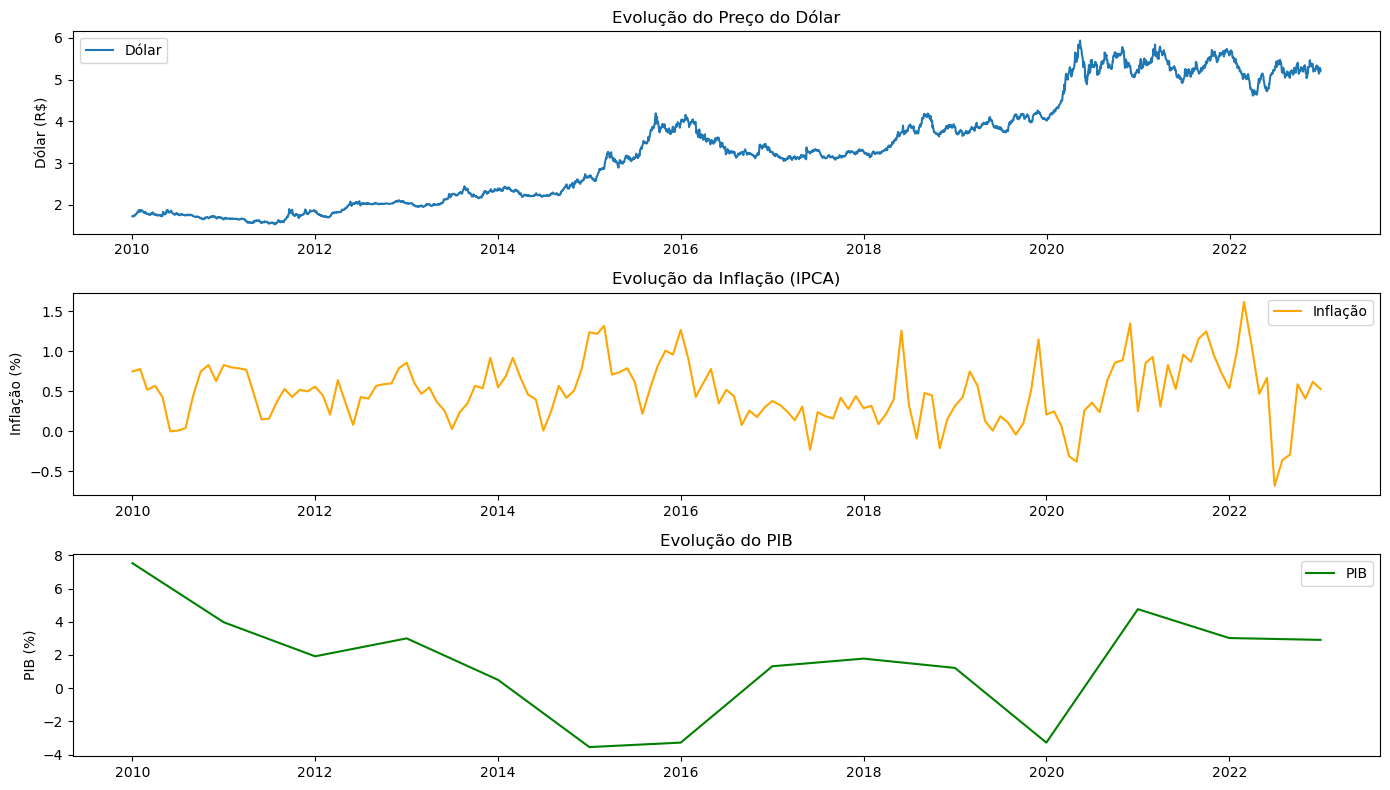

In [145]:


# Plotando as séries temporais
plt.figure(figsize=(14, 8))

# Preço do Dólar
plt.subplot(3, 1, 1)
plt.plot(dados_dolar, label='Dólar')
plt.title('Evolução do Preço do Dólar')
plt.ylabel('Dólar (R$)')
plt.legend()

# Inflação
plt.subplot(3, 1, 2)
plt.plot(dados_inflacao, label='Inflação', color='orange')
plt.title('Evolução da Inflação (IPCA)')
plt.ylabel('Inflação (%)')
plt.legend()

# PIB
plt.subplot(3, 1, 3)
plt.plot(dados_pib, label='PIB', color='green')
plt.title('Evolução do PIB')
plt.ylabel('PIB (%)')
plt.legend()

plt.tight_layout()
plt.show()


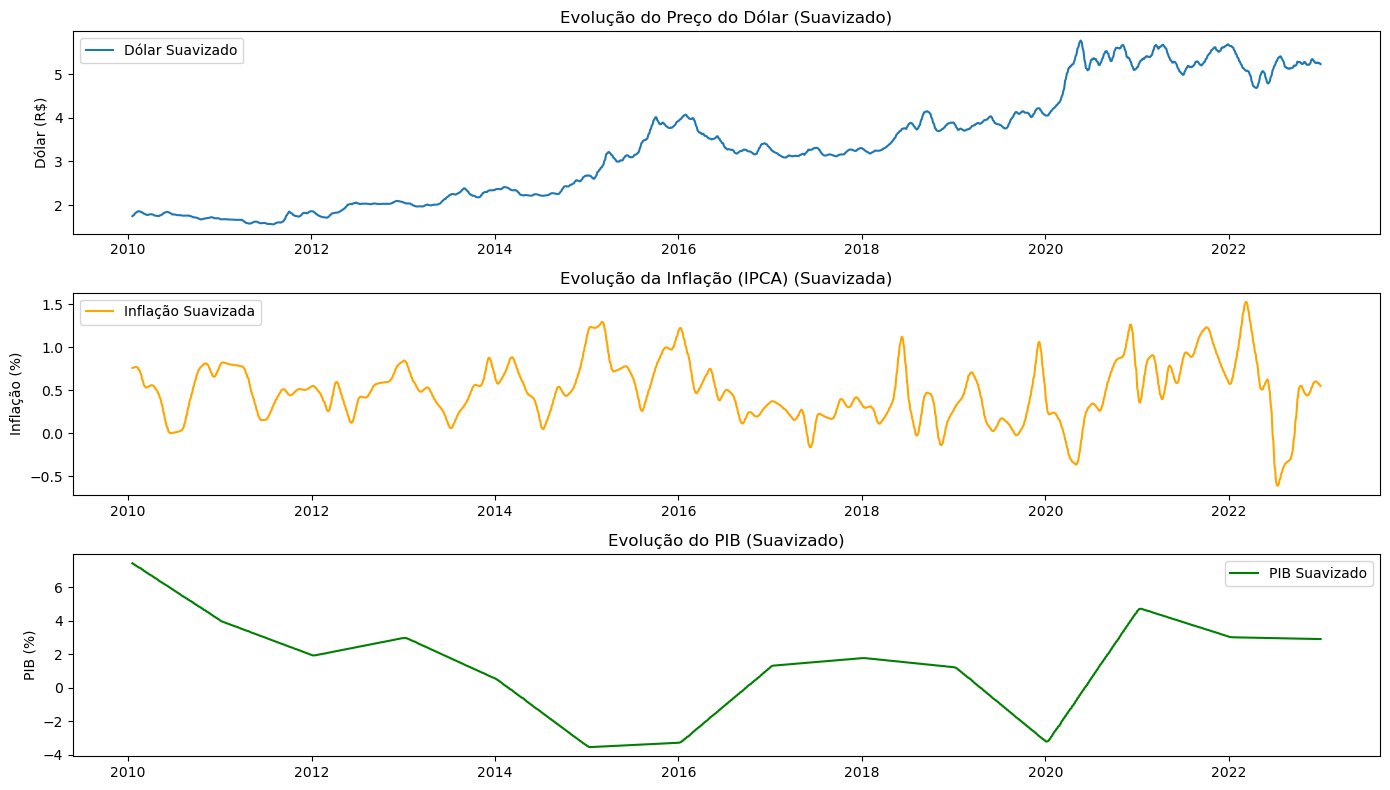

In [146]:
# Suavização das séries temporais com média móvel
dados_suavizados = dados_interpolados.rolling(window=12).mean()

# Plotando as séries suavizadas
plt.figure(figsize=(14, 8))

# Preço do Dólar
plt.subplot(3, 1, 1)
plt.plot(dados_suavizados['Dolar'], label='Dólar Suavizado')
plt.title('Evolução do Preço do Dólar (Suavizado)')
plt.ylabel('Dólar (R$)')
plt.legend()

# Inflação
plt.subplot(3, 1, 2)
plt.plot(dados_suavizados['Inflacao'], label='Inflação Suavizada', color='orange')
plt.title('Evolução da Inflação (IPCA) (Suavizada)')
plt.ylabel('Inflação (%)')
plt.legend()

# PIB
plt.subplot(3, 1, 3)
plt.plot(dados_suavizados['PIB'], label='PIB Suavizado', color='green')
plt.title('Evolução do PIB (Suavizado)')
plt.ylabel('PIB (%)')
plt.legend()

plt.tight_layout()
plt.show()
